# Trabalho Prático 2 de Ciência de Dados 

### Descrição

Comparação de diferentes algoritmos para criação de modelos.

### Objetivos

1. Buscar e utilizar algoritmos não vistos na disciplina para tarefas de Regressão e Classificação.
2. Comparar os algoritmos escolhidos com conjuntos de dados reais utilizando métricas de avaliação vistas ou não na disciplina.

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210



# *Brazilian Houses to Rent*

![Kaggle - Brazilian Houses to Rent Dataset](https://i.imgur.com/wOKxor1.pnghttps://i.imgur.com/wOKxor1.png)

O dataset escolhido para realização deste trabalho trata-se do [*Brazilian Houses to Rent*](https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent/code), disponível na comunidade de Ciência de Dados [*Kaggle*: *Your Home for Data Science*](https://www.kaggle.com/).

Escolhemos apenas este *dataset* para a realização do trabalho por possuir *features* (atributos) que podem ser utilizadas tanto para a tafera de Regressão quanto para a tarefa de Classificação.

![Kaggle - Brazilian Houses to Rent Dataset](https://drive.google.com/uc?id=1KgiGRYBMe6tiQWYOJU8vtr-zgGX6aiCj)

---

### Descrição do *Brazilian Houses to Rent Dataset*

O *dataset* possui 10.962 casas para alugar, com 13 classes diferentes.

- **FAQ - *Outliers*:**

  > Podem haver alguns valores no *dataset* que são considerados *outliers* para a análise. Tendo em vista que foi utilizado um *WebCrawler* apenas para capturar os dados, os mesmos estão sujeitos a problemas como erros nos cadastros.

- **Sumário:**
  > - 2 arquivos (estamos usando a versão 2 dos dados)
  > - Possui 1.12 MB de tamanho
  > - Arquivo da versão 2 tem 681.43 KB de tamanho e 13 colunas

# Imports

In [8]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as plt_colors
import matplotlib.ticker as ticker

from sklearn.preprocessing import OneHotEncoder

CMAP_ICEFIRE = plt.get_cmap('icefire')
DEFAULT_FONT_SIZE = 14
plt.rcParams['font.size'] = DEFAULT_FONT_SIZE

BASE_PATH = '.'

In [9]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')
import utils
from importlib import reload

# Leitura dos Dados

In [10]:
df = pd.read_csv(BASE_PATH + '/Dataset/houses_to_rent_v2.csv')

df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [11]:
print('Número de instâncias = {}'.format(len(df)))
print('Número de atributos = {}'.format(len(df.columns)))

Número de instâncias = 10692
Número de atributos = 13


In [12]:
print('Tipos de cada atributo:\n{}'.format(df.dtypes))

Tipos de cada atributo:
city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object


In [13]:
print('Valores faltantes em cada coluna:')
for col in df.columns:
  print('{} = {}'.format(col, df[col].isnull().sum()))

Valores faltantes em cada coluna:
city = 0
area = 0
rooms = 0
bathroom = 0
parking spaces = 0
floor = 0
animal = 0
furniture = 0
hoa (R$) = 0
rent amount (R$) = 0
property tax (R$) = 0
fire insurance (R$) = 0
total (R$) = 0


In [14]:
dups = df.duplicated()
print('Número de linhas duplicadas = {}'.format(dups.sum()))

Número de linhas duplicadas = 358


In [15]:
print('Número de instâncias = {}'.format(len(df)))

# Excluindo as linhas duplicadas
df.drop_duplicates(inplace=True)
print('Número de instâncias após a remoção = {}'.format(len(df)))

Número de instâncias = 10692
Número de instâncias após a remoção = 10334


# Parte 1. Análise Exploratória & Pré-Processamento dos Dados

## Tipos de Atributos dos Dados

- **Atributos Categóricos:**
> Um atributo categórico é aquele que possui duas ou mais categorias. Por exemplo, no *Brazilian Houses to Rent Dataset*, `animal` é um atributo categórico aparentemente com duas categorias (*accept* e *not accept*). Não podemos classificar ou dar qualquer ordem a tais variáveis.
> - Atributos categóricos nos dados: `city`, `animal` e `furniture`.

- **Atributos Ordinais ou Discretos:**
> Um atributo ordinal é semelhante a um atributo categórico. A diferença é que podemos ter uma ordenação relativa ou classificação entre os valores dos atributos ordinais. 
>
> Um atributo discreto deve ter apenas valores específicos. Pode haver um número infinito desses valores, mas cada um é distinto e não há uma área cinza no meio. Por exemplo, `rooms` e `bathroom` são atributos discretos (números de quartos e números de banheiros).
> - Atributos ordinais ou discretos nos dados: `rooms`, `bathroom` e `floor`.

- **Atributos Contínuos:**
> Um atributo é considerado contínuo se poder assumir valores entre quaisquer dois pontos ou valores entre um mínimo e um máximo.
> - Atributos contínuos nos dados: `area`, `hoa (R$)`,	`rent amount (R$)`,	`property tax (R$)`,	`fire insurance (R$)` e	`total (R$)`.

## Atributos Categóricos

Primeiramente, vamos analisar os **atributos categóricos** que, como já descrito anteriormente, são 3:

- `city` - atributo que indica qual cidade a casa está disponível para ser alugada.
- `animal` - atributo que indica se a casa aceita ou não animais.
- `furniture` - atributo que indica se a casa já está ou não mobiliada.

In [16]:
df.describe(include='O')

,city,floor,animal,furniture
count,10334,10334,10334,10334
unique,5,35,2,2
top,São Paulo,-,acept,not furnished
freq,5717,2371,8076,7819


In [17]:
# Estranho 'floor' ter aparecido como dado categórico, provavelmente por conta da presença de '-', que corresponde a uma casa real e não a um apartamento
# Primeiro, vamos verificar o tipo da coluna e seus valores únicos, e substituir '-' por 0
print('Tipo da coluna floor: {}'.format(df['floor'].dtypes))
print('Valores únicos de floor: {}'.format(df['floor'].unique().tolist()))
df['floor'] = pd.to_numeric(df['floor'].replace('-', 0))

Tipo da coluna floor: object
Valores únicos de floor: ['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9', '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21', '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51', '32']


In [18]:
# Modificando o tipo da coluna 'floor' para int
df['floor'] = df['floor'].astype(int)
print('Tipo da coluna floor: {}'.format(df['floor'].dtypes))

df.describe(include='O')

Tipo da coluna floor: int64


,city,animal,furniture
count,10334,10334,10334
unique,5,2,2
top,São Paulo,acept,not furnished
freq,5717,8076,7819


De acordo com o `.describe()`, os dados possuem informações de 5 cidades. Além disso, `animal` e `furniture` possuem 2 tipos de valores (provavelmente valores binários).

In [19]:
print('Valores únicos das colunas:\n  - city -> {}\n  - animal -> {}\n  - furniture -> {}'.format(df['city'].unique(), df['animal'].unique(), df['furniture'].unique()))

Valores únicos das colunas:
  - city -> ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
  - animal -> ['acept' 'not acept']
  - furniture -> ['furnished' 'not furnished']


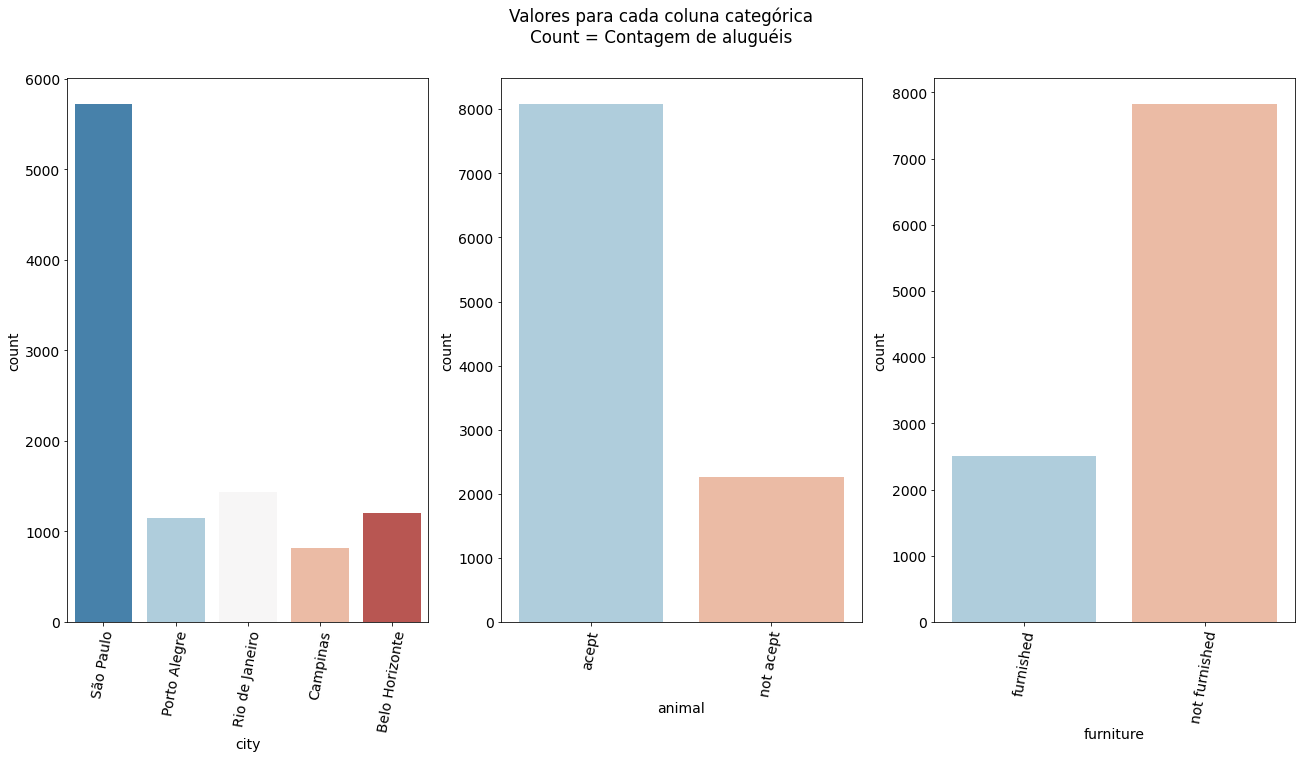

In [20]:
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

utils.countplot_grid(df, cat_cols, title='Valores para cada coluna categórica')

Como provavelmente iremos usar os atributos categóricos como preditores nas Partes 2 e 3 do trabalho, modelos veem os dados diferente de como nós (humanos) vemos, então precisamos transformar as variáveis negativas e positivas das colunas `animal` e `furtinure` em 0 e 1, respectivamente. Também precisamos transformar os nomes das cidades de `city` em números, utilizando uma técnica chamada *one-hot encoding*, já que as cidades não tem uma prioridade (se tivessem, aqui poderíamos usar *label encoding*, por exemplo) e não podem aparecer em qualquer ordem.

* **Observação:**

> Os atributos categóricos estão claramente desbalanceados. Por exemplo, no atributo `animal`, o número de casas que aceitam animais é bem maior do que as das que não aceitam. Além de `animal`, os atributos `city` e `furniture` também estão desbalanceados. Isso é um problema, pois um classificador tenderá a aprender mais sobre as classes que aparecem com bastante frequência. Na Parte 2 deste trabalho, lidaremos e trataremos esses dados desbalanceados.

In [21]:
# Realizando codificação one-hot em city
enc = OneHotEncoder(sparse=False)
df['city_enc'] = df['city'].astype('category').cat.codes.astype(int) # Convertendo os valores em números
df_enc_city = pd.DataFrame(enc.fit_transform(df[['city']])) # Transformando os valores em vetores binários

# Concatenando os dois dataframes
df = pd.concat([df.reset_index(drop=True), df_enc_city.reset_index(drop=True)], axis=1)
df.rename(columns={
    0: 'city_pos_0', # São Paulo
    1: 'city_pos_1', # Porto Alegre
    2: 'city_pos_2', # Rio de Janeiro
    3: 'city_pos_3', # Campinas
    4: 'city_pos_4'  # Belo Horizonte
}, inplace=True)

city_enc_labels = ['city_pos_' + str(i) for i in range(0, 5)]
df[city_enc_labels] = df[city_enc_labels].astype(int)
df['furniture'] = df['furniture'].map({'not furnished': 0, 'furnished': 1}) 
df['animal'] = df['animal'].map({'not acept': 0, 'acept': 1})

df[cat_cols + city_enc_labels + ['city_enc']].head(10)

,city,animal,furniture,city_pos_0,city_pos_1,city_pos_2,city_pos_3,city_pos_4,city_enc
0,São Paulo,1,1,0,0,0,0,1,4
1,São Paulo,1,0,0,0,0,0,1,4
2,Porto Alegre,1,0,0,0,1,0,0,2
3,Porto Alegre,1,0,0,0,1,0,0,2
4,São Paulo,0,0,0,0,0,0,1,4
5,São Paulo,1,0,0,0,0,0,1,4
6,Rio de Janeiro,1,0,0,0,0,1,0,3
7,São Paulo,1,0,0,0,0,0,1,4
8,São Paulo,1,1,0,0,0,0,1,4
9,Rio de Janeiro,1,1,0,0,0,1,0,3


- **Matriz de correlação dos atributos categóricos:**

> Avaliando a matriz de correlação abaixo, notamos que os atributos possuem correlações positivas e negativas. No entanto, nenhum deles possui uma correlação próxima a 1, o que indica que não estão relacionados.

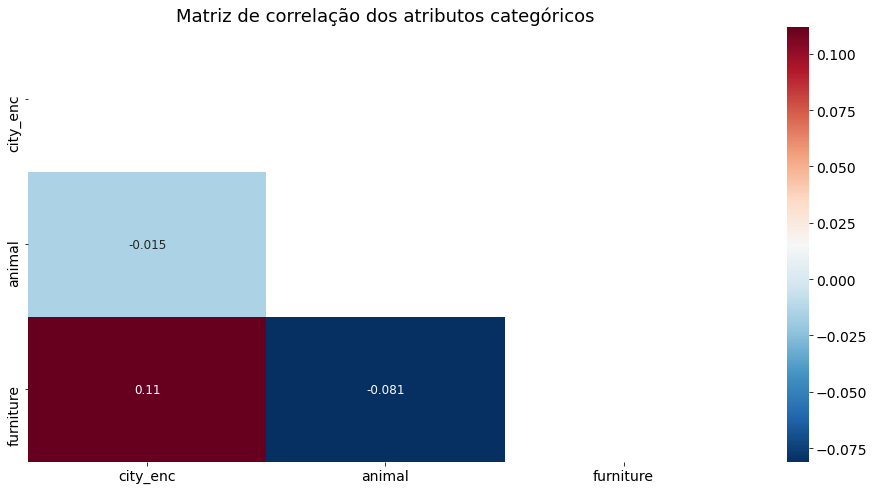

In [22]:
utils.plot_corr_matrix(df, 
                       [i if i != 'city' else 'city_enc' for i in cat_cols], 
                       title='Matriz de correlação dos atributos categóricos')

In [23]:
# Não iremos dropar city pois iremos utilizar os nomes das cidades em futuras análises
# Iremos dropar apenas city_enc
df.drop('city_enc', inplace=True, axis=1)

## Atributos Ordinais ou Discretos

Agora, iremos analisar os **atributos ordinais ou discretos**, que também são 3:

- `rooms` - quantidade de quartos existentes na casa.
- `bathroom` - quantidade de banheiros existentes na casa.
- `floor` - andar no qual a casa está disponível para aluguel.
- `parking spaces` - quantidade de vagas de estacionamento.

In [24]:
ord_cols = ['rooms', 'bathroom', 'floor', 'parking spaces']

df[ord_cols].describe()

,rooms,bathroom,floor,parking spaces
count,10334.000000,10334.000000,10334.000000,10334.000000
mean,2.539965,2.268725,5.100929,1.644475
std,1.168185,1.414650,6.067906,1.598527
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000
50%,3.000000,2.000000,3.000000,1.000000
75%,3.000000,3.000000,8.000000,2.000000
max,13.000000,10.000000,301.000000,12.000000


Existe uma casa que fica no 301º andar?! Provavelmente, esse valor se trata de um *outlier*. 

> - **Curiosidade:** 
>
> Fizemos uma pesquisa rápida e o prédio mais alto do Brasil atualmente é o edifício [*YachtHouse*](https://www.vivadecora.com.br/pro/curiosidades/predio-mais-alto-do-brasil/) localizado em Balneário Camboriú, Santa Catarina, ele possui 81 andares.

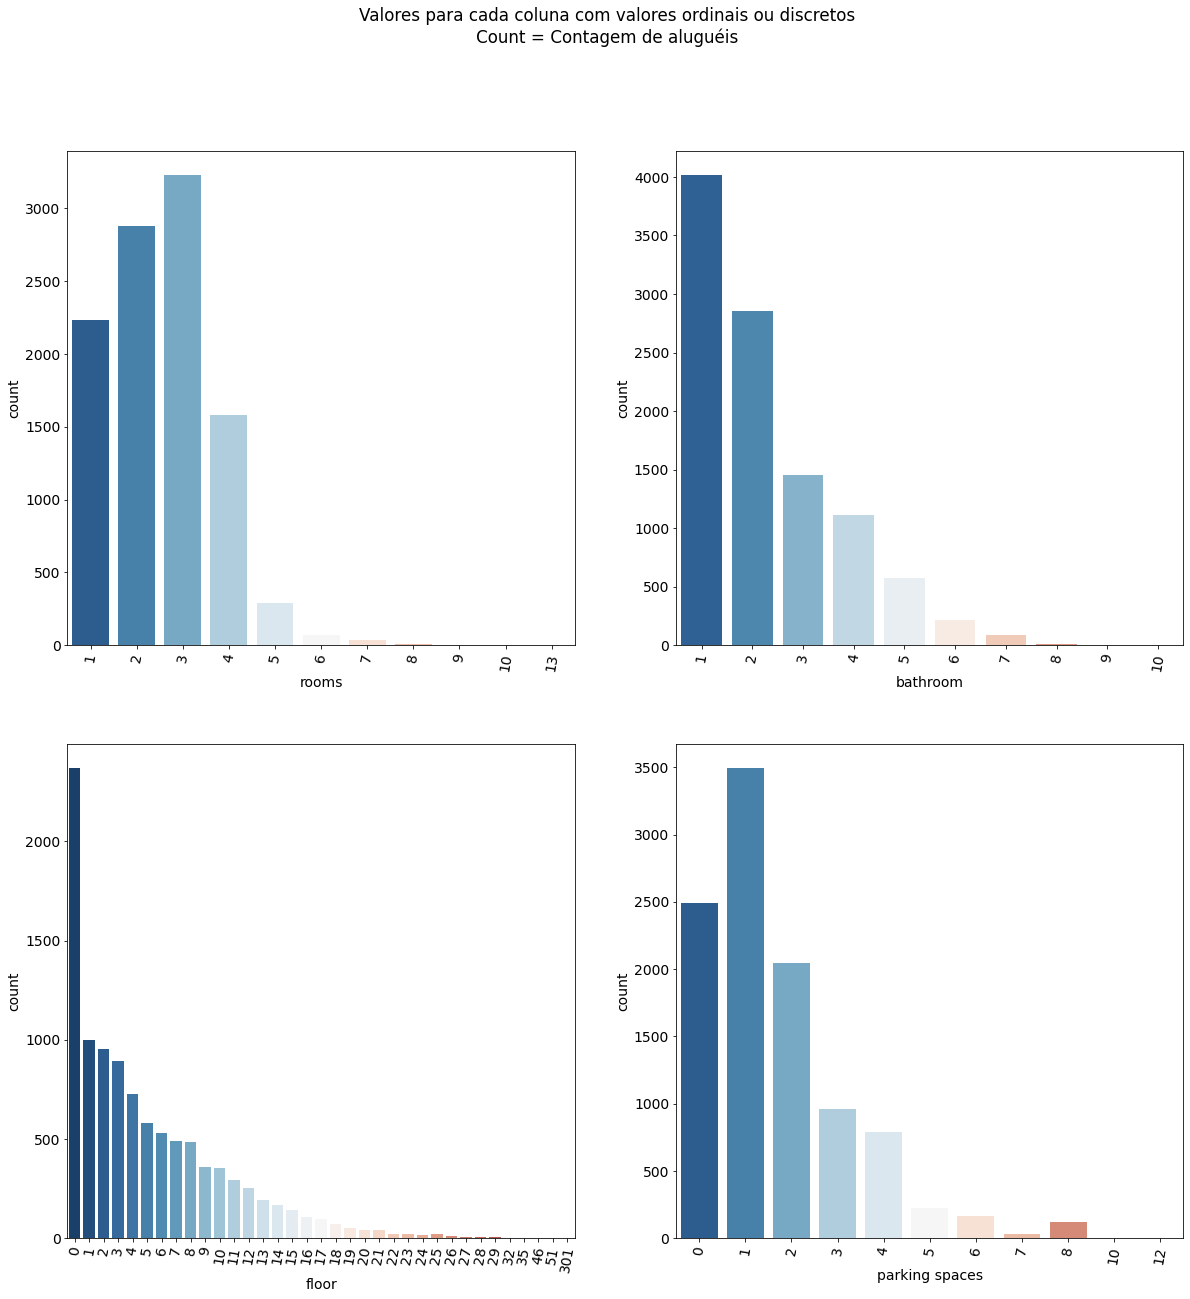

In [25]:
utils.countplot_grid(df, ord_cols, title='Valores para cada coluna com valores ordinais ou discretos')

In [26]:
print('Número de instâncias = {}'.format(len(df)))

# Sim, o 301º de uma das casas se trata de um outlier. Iremos excluir essa linha
df.drop(df.loc[df['floor'] == 301].index, inplace=True)
print('Número de instâncias após a remoção = {}'.format(len(df)))

Número de instâncias = 10334
Número de instâncias após a remoção = 10333


- **Matriz de correlação dos atributos ordinais ou discretos:**

> Avaliando a matriz de correlação abaixo, notamos que os atributos possuem correlações positivas e negativas. Temos apenas uma correlação próxima a 1, entre `rooms` e `bathroom`, `parking spaces` e `rooms`, e `parking spaces` e `bathroom`, o que indica que as variáveis estão relacionadas e movem-se juntas.

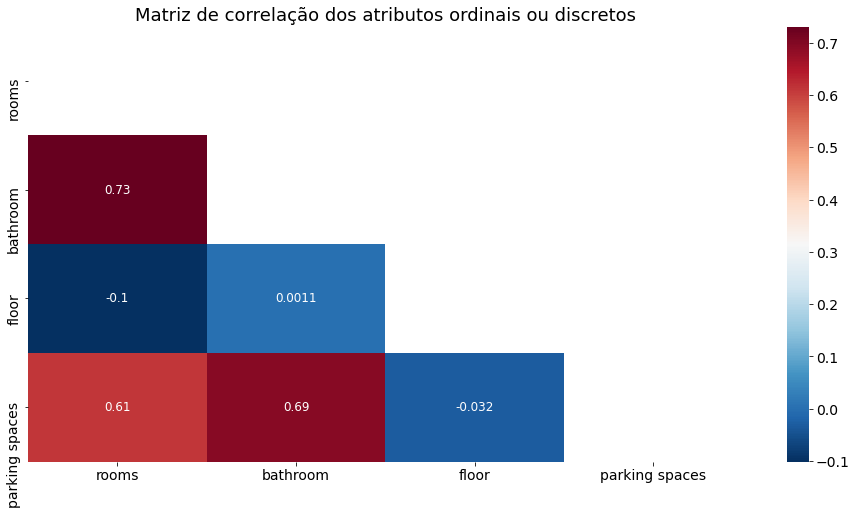

In [27]:
utils.plot_corr_matrix(df, ord_cols, title='Matriz de correlação dos atributos ordinais ou discretos')

## Atributos Contínuos

Por fim, iremos analisar os **atributos contínuos**, que são 5:

- `area`- área da propriedade da casa.
- `hoa (R$)` - valor do condomínio.
- `rent amount (R$)` - valor do aluguel.
- `property tax (R$)` - valor do imposto municipal (IPTU).
- `fire insurance (R$)` - valor do seguro residencial contra incêndio.
- `total (R$)` - soma dos quatro atributos anteriores.

In [28]:
cont_cols = df.columns[8:13].tolist()
print('Número de instâncias = {}'.format(len(df)))
print('Número de instâncias = {}'.format(len(df)))
cont_cols.insert(0, 'area')
pd.set_option('float_format', '{:f}'.format)

df[cont_cols].describe()

Número de instâncias = 10333
Número de instâncias = 10333


,area,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
count,10333.000000,10333.000000,10333.000000,10333.000000,10333.000000,10333.000000
mean,152.446434,1091.276977,3966.428240,376.949869,54.266138,5489.131230
std,545.901546,11446.645671,3436.330000,3160.754419,48.166338,12669.709466
min,11.000000,0.000000,450.000000,0.000000,3.000000,499.000000
25%,59.000000,180.000000,1598.000000,41.000000,21.000000,2116.000000
50%,95.000000,571.000000,2750.000000,130.000000,37.000000,3686.000000
75%,190.000000,1287.000000,5000.000000,390.000000,70.000000,6913.000000
max,46335.000000,1117000.000000,45000.000000,313700.000000,677.000000,1120000.000000


Com o `.describe`, notamos que talvez há uma grande quantidade de *outliers* nestes atributos contínuos. Primeiro, iremos analisar cada uma das taxas (*hoa*, *rent*, *property tax* e *fire insurance*), seguindo depois pelo valor total dessas residências.

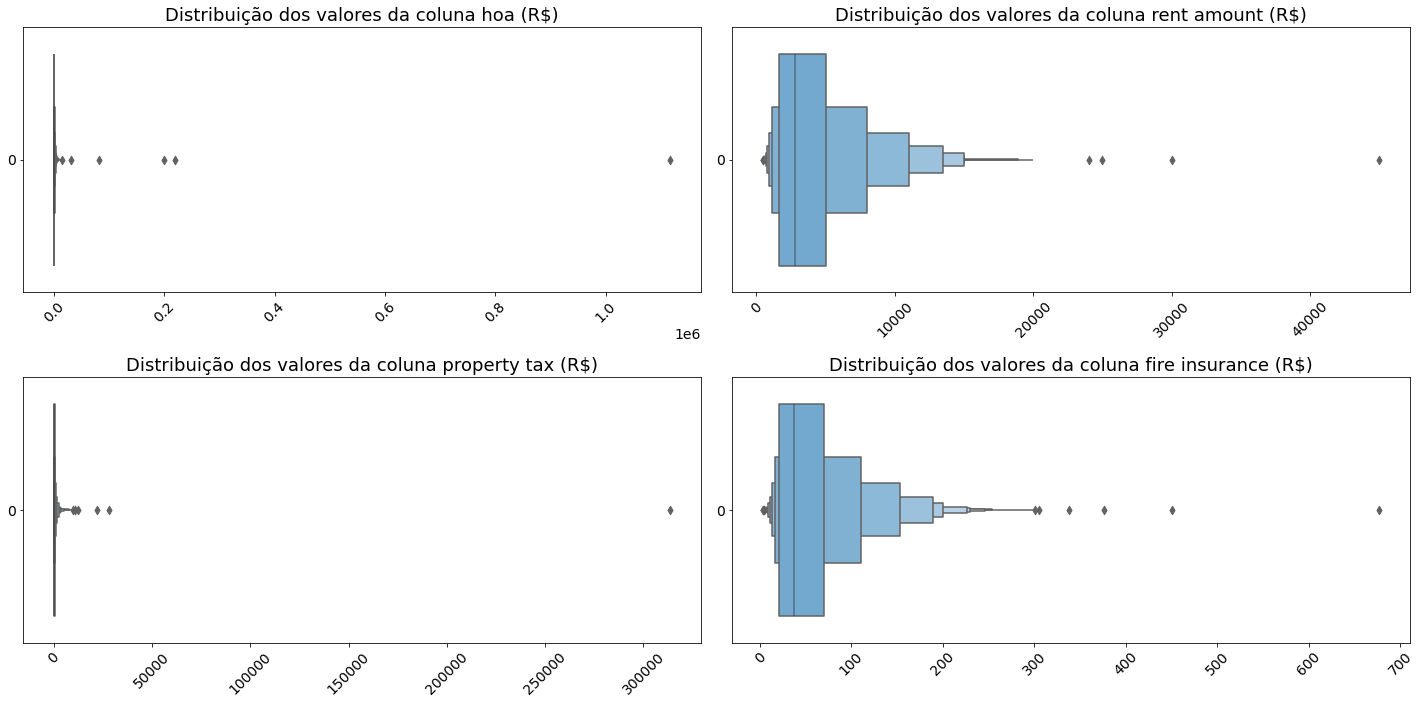

In [29]:
utils.boxenplot_continuos_features(df, cont_cols)

Os 4 atributos contínuos analisados acima possuem *outliers* muito grandes. Como todos foram somados para criação da coluna `total (R$)`, iremos levar ela em conta para a remoção das linhas que possuem esse valores. 

A partir de 33000 é que começam a aparecer os strong outliers.


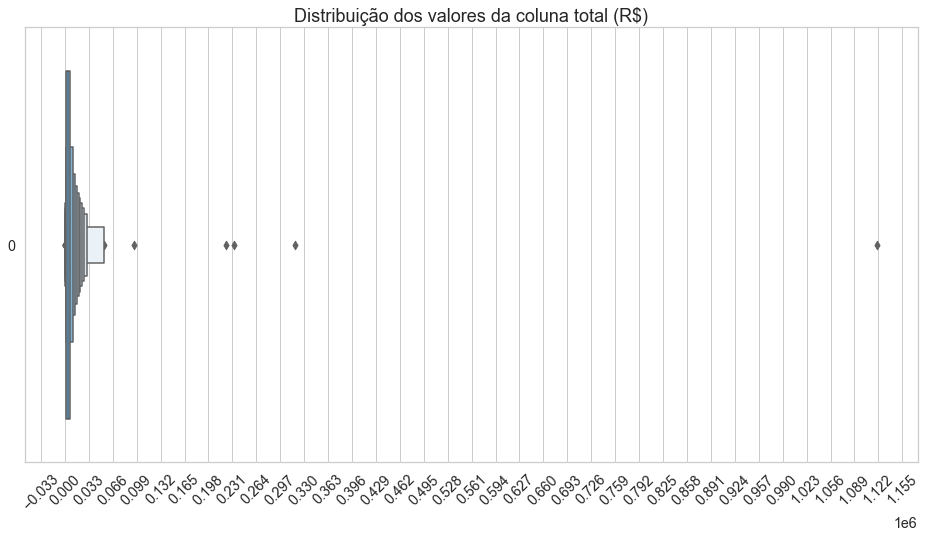

In [30]:
utils.plot_distribution_large_data(df['total (R$)'], 
                                   title='Distribuição dos valores da coluna total (R$)', 
                                   xaxis_interval=33000) # xaxis_interval = tem que ser muito maior que o percentil de 75%

print('A partir de {} é que começam a aparecer os strong outliers.'.format('{:f}'.format(0.033e6).split('.')[0]))

In [31]:
# O gráfico mostra um outlier muito grande, de mais de um milhão (1.120.000), que já pode ser visto com o .describe()
# Iremos filtrar os outliers para manter um valor total menor ou igual a 33.000
print('Número de instâncias = {}'.format(len(df)))

df = df[df['total (R$)'] <= 33000]
print('Número de instâncias após a remoção = {}'.format(len(df)))

Número de instâncias = 10333
Número de instâncias após a remoção = 10327


A seguir, novamente visualizamos os *boxplots* para verificar a nova distribuição. Podemos perceber que melhorou bastante!

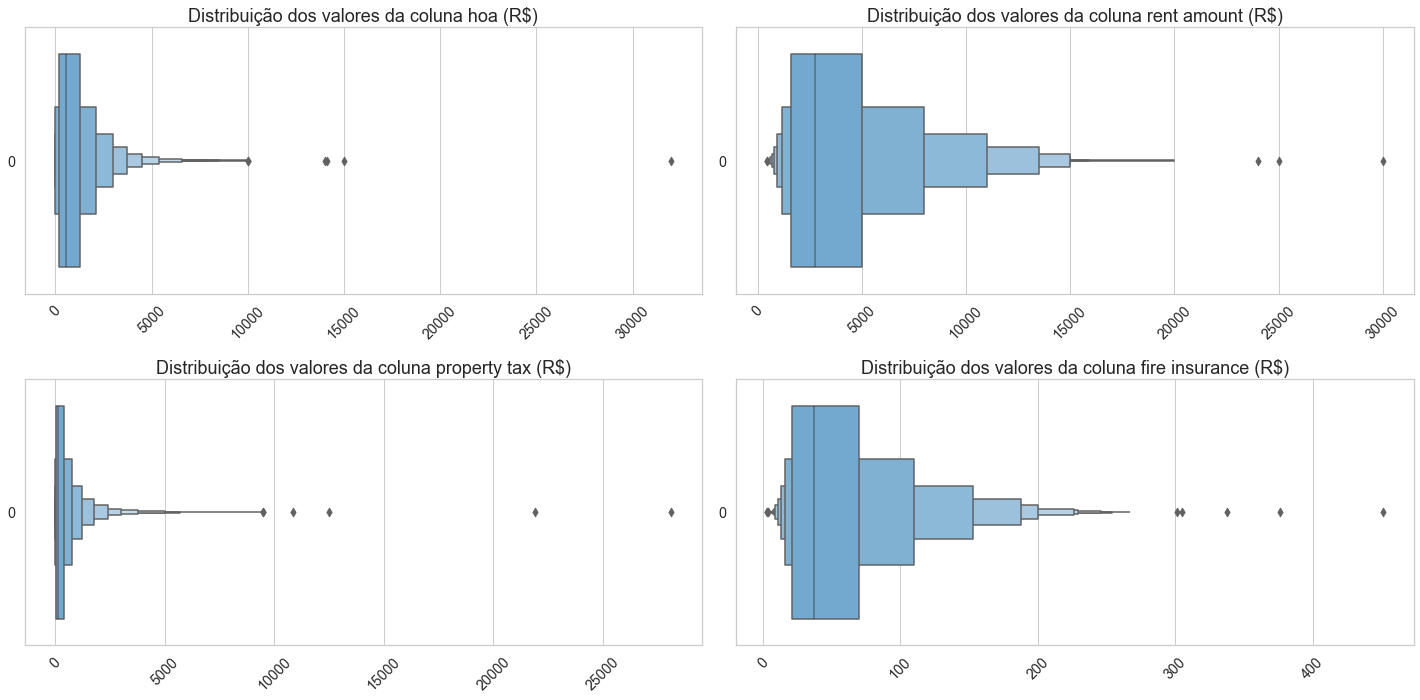

In [32]:
utils.boxenplot_continuos_features(df, cont_cols)

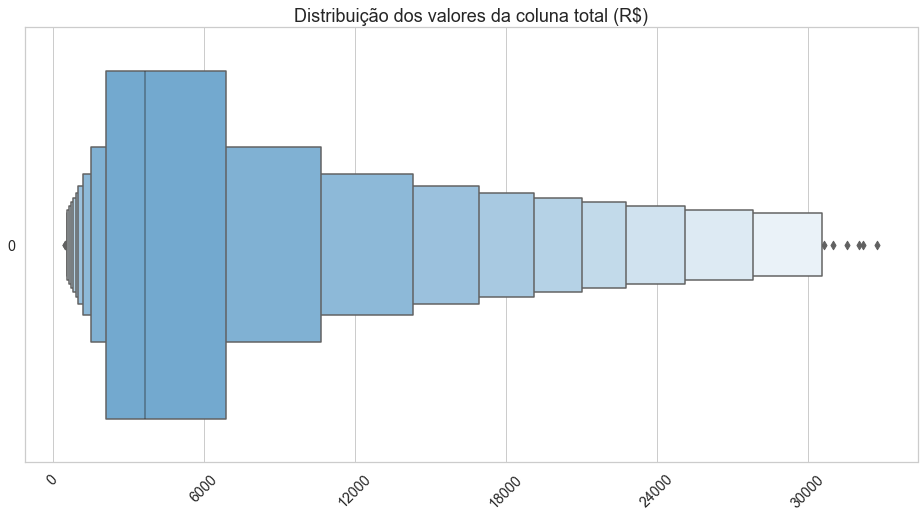

In [33]:
utils.plot_distribution_large_data(df['total (R$)'], 
                             title='Distribuição dos valores da coluna total (R$)', 
                             xaxis_interval=6000) # xaxis_interval = um pouco menor que o percentil de 75%

- **Matriz de correlação dos atributos contínuos:**

> Avaliando a matriz de correlação abaixo, notamos que os atributos contínuos possuem apenas correlações positivas. Já esperávamos que pelo menos os atributos que possuem taxas possuíssem relações uns com os outros. Só ficamos um pouco surpresos com os valores de correlação para `area`, que não são próximos de 1. 

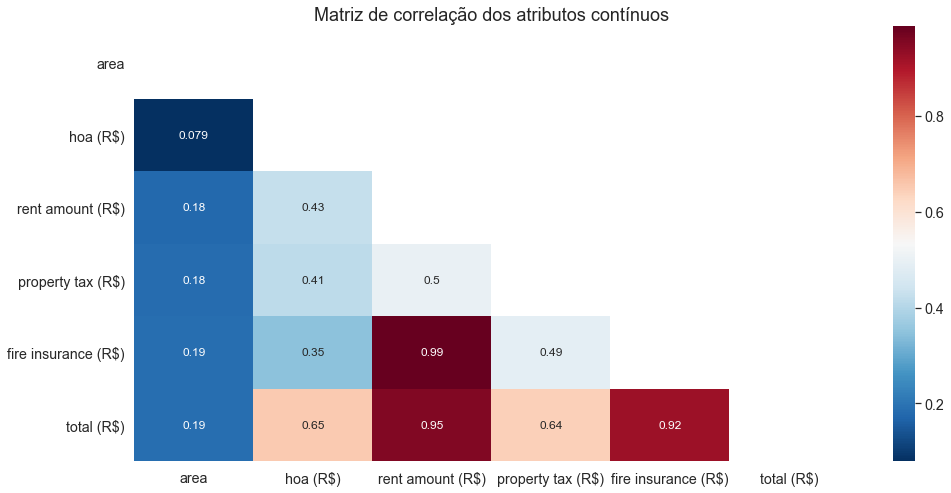

In [34]:
utils.plot_corr_matrix(df, cont_cols, title='Matriz de correlação dos atributos contínuos')

### Casas com um grande espaço interno (área em m²) são mais caras?

Mesmo que os valores para `area` na matriz de correlação acima não sejam próximos de 1, iremos verificar abaixo se casas espaçosas são mais caras. Antes disso, iremos verificar quais são os *outliers* dessa coluna e fazer a remoção deles.

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$),city_pos_0,city_pos_1,city_pos_2,city_pos_3,city_pos_4
2367,Belo Horizonte,46335,4,8,5,11,1,1,960,8500,646,114,10220,1,0,0,0,0
5790,São Paulo,24606,5,4,4,12,1,0,2254,8100,7859,103,18320,0,0,0,0,1
8965,Campinas,12732,3,2,0,3,1,0,700,1600,96,21,2417,0,1,0,0,0
5038,Belo Horizonte,2000,4,2,3,0,1,0,0,4956,200,82,5238,1,0,0,0,0
8539,Belo Horizonte,2000,3,3,2,2,1,1,3000,5000,200,67,8267,1,0,0,0,0


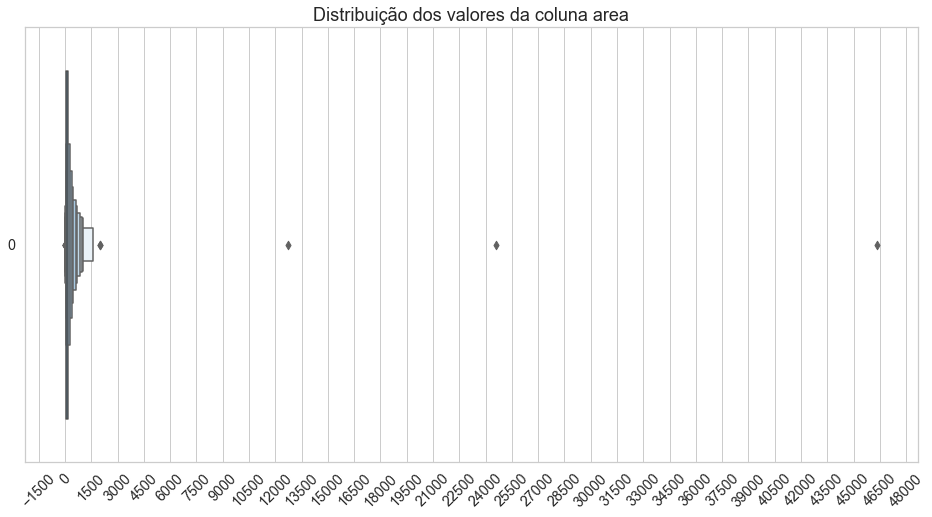

In [35]:
utils.plot_distribution_large_data(df['area'], 
                                   title='Distribuição dos valores da coluna area', 
                                   xaxis_interval=1500) # xaxis_interval = maior que o percentil de 75%

# Apartamento no 11º andar com 46.335 metros quadrados?!
df.sort_values(by='area', ascending=False).head()

In [36]:
# Iremos filtrar os outliers para manter um valor total menor ou igual a 2.000
print('Número de instâncias = {}'.format(len(df)))

df = df[df['area'] <= 1500]
print('Número de instâncias após a remoção = {}'.format(len(df)))

Número de instâncias = 10327
Número de instâncias após a remoção = 10320


Estatísticas básicas:
count   10320.000000
mean      143.682074
std       131.258928
min        11.000000
25%        59.000000
50%        94.500000
75%       190.000000
max      1100.000000
Name: area, dtype: float64


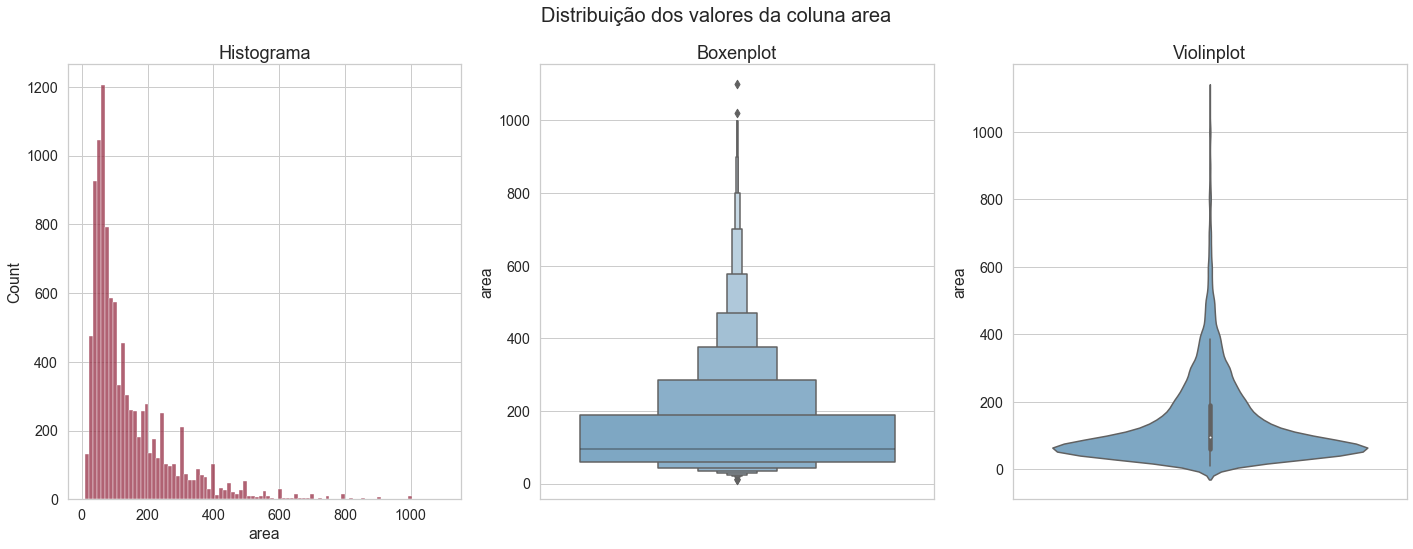

In [37]:
print('Estatísticas básicas:\n{}'.format(df['area'].describe()))

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
fig.suptitle('Distribuição dos valores da coluna area', fontsize=20)

colors_icefire = [plt_colors.rgb2hex( CMAP_ICEFIRE(i)[:3]) for i in range(CMAP_ICEFIRE.N)]

sns.histplot(ax=axs[0], x='area', data=df, color=colors_icefire[180])
axs[0].set_title('Histograma', fontsize=18)

sns.boxenplot(ax=axs[1], y='area', data=df, palette='PuBu')
axs[1].set_title('Boxenplot', fontsize=18)

sns.violinplot(ax=axs[2], y='area', data=df, palette='PuBu')
axs[2].set_title('Violinplot', fontsize=18)

plt.show()

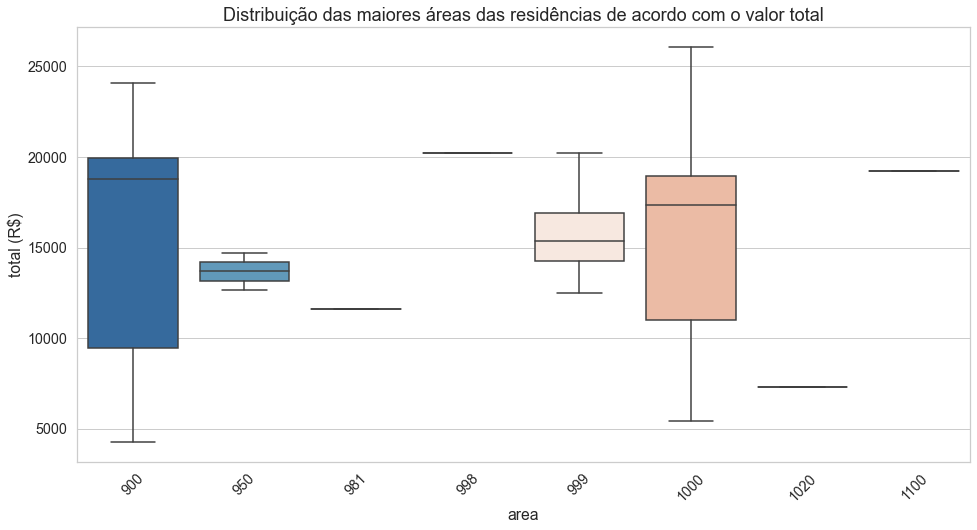

In [38]:
df_large_houses = df[df['area'] >= 900] # Casas que possuem uma grande área

plt.figure(figsize=(16, 8))
plt.title('Distribuição das maiores áreas das residências de acordo com o valor total', fontsize=18)
ax = sns.boxplot(x='area', y='total (R$)', data=df_large_houses, palette='RdBu_r')
plt.setp(ax.get_xticklabels(), rotation=45);

- **Observações:**

> Algumas das residências com as maiores áreas realmente são mais caras. Mas, como esperado, depois da análise da matriz de confusão, os valores não são tão óbvios assim.

### Os atributos categóricos impactam no valor total das casas?

- Dependendo da cidade, o valor total aumenta? 
- Ter animais impacta no valor total das casas?
- Casas mobiliadas são mais caras?

Podemos obter as respostas para as perguntas acima a partir da análise dos seguintes *boxplots*.


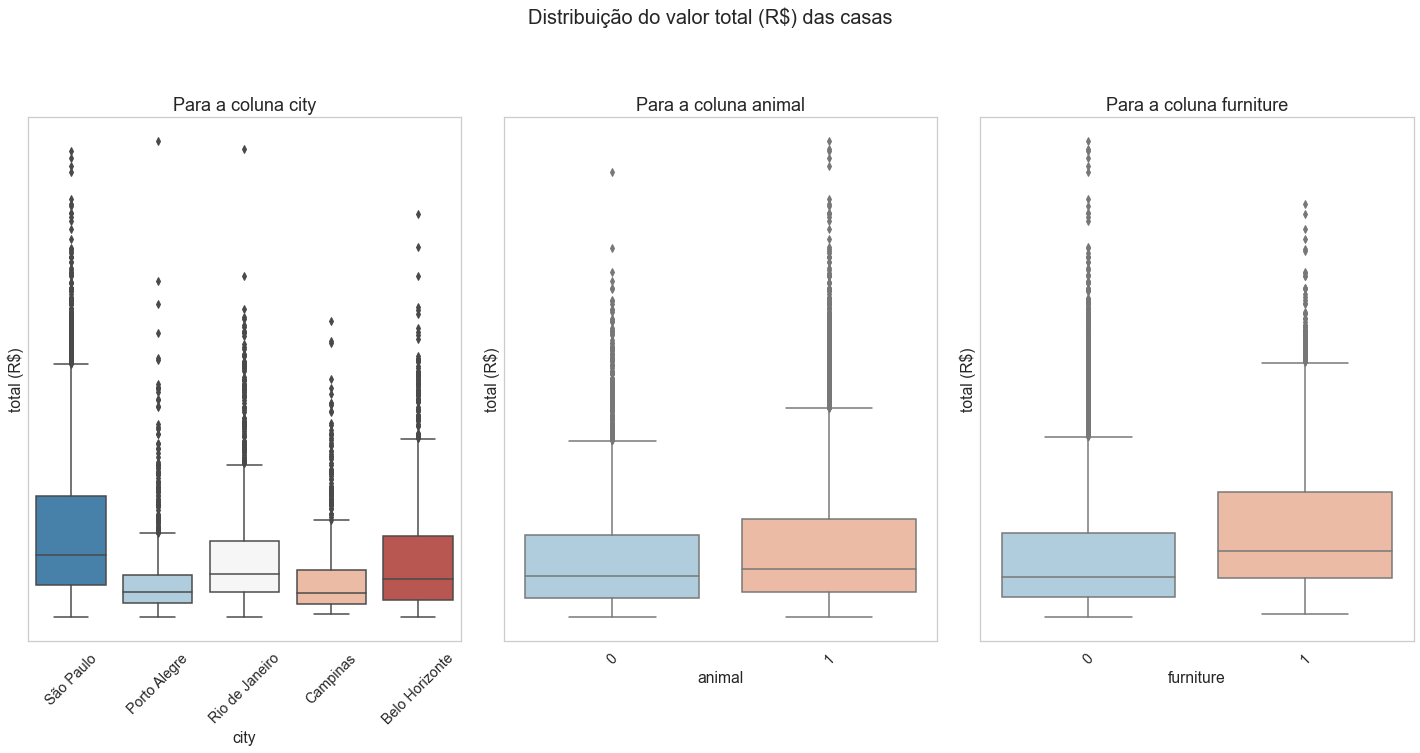

In [39]:
utils.boxenplot_grid_quantitative_features(df, cat_cols, suptitle='Distribuição do valor total (R$) das casas')

- **Dependendo da cidade, o valor total aumenta?** *Sim, São Paulo é a cidade com a maior quantidade de casas bem caras disponíveis para aluguel. Detalhe para duas casas em Porto Alegre e no Rio de Janeiro que são bastante caras.*
- **Ter animais impacta no valor total das casas?** *Não muito, mas as casas mais caras aceitam animais.*
- **Casas mobiliadas são mais caras?** *Na verdade, algumas casas que não possuem mobília têm valores bem altos.*

### Os atributos ordinais ou discretos impactam no valor total das casas?

- Casas com muitos quartos são mais caras? 
- Casas com muitos banheiros são mais caras? 
- O andar impacta no valor total das casas? 
- Casas com muitas vagas para estacionamento são mais caras?


Podemos obter as respostas para as perguntas acima a partir da análise dos seguintes *boxplots*.



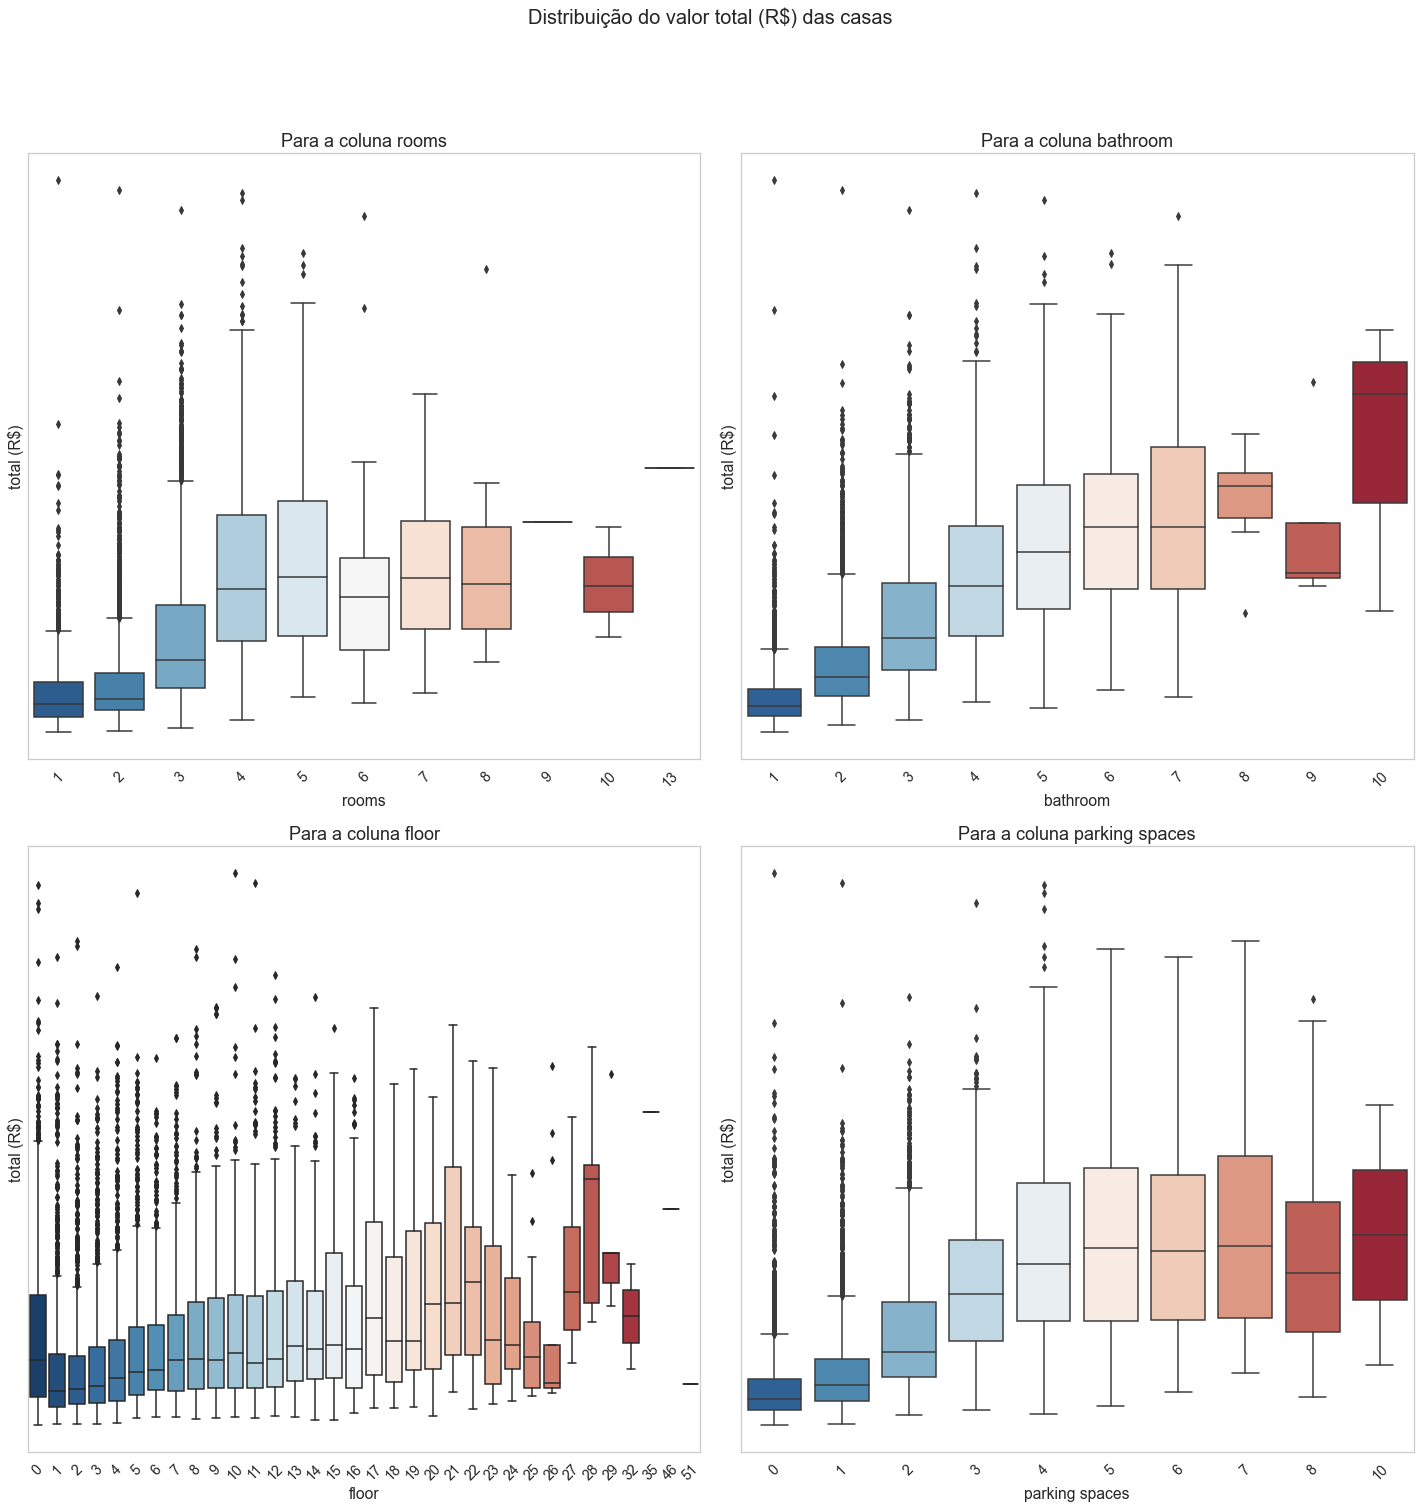

In [40]:
utils.boxenplot_grid_quantitative_features(df, ord_cols, suptitle='Distribuição do valor total (R$) das casas')

- **Casas com muitos quartos são mais caras?** *Não, os valores variam muito.*
- **Casas com muitos banheiros são mais caras?** *Algumas das casas mais caras possuem muitos banheiros. Ex.: casas com 10 banheiros.*
- **O andar impacta no valor total das casas?** *Sim! Mas os valores variam muito também entre o que é realmente casa e casas que na verdade são apartamentos.*
- **Casas com muitas vagas para estacionamento são mais caras?** *Sim! Com o gráfico, podemos perceber que é comum o valor do aluguel do imóvel subir de acordo com a quantidade de vagas até certo número. É notável que após 5 vagas o valor do imóvel mantém um padrão.*

# Salvando a Parte 1

Salvando todas as mudanças feitas nos atributos em um novo arquivo .*csv*.

In [41]:
# Dropando city
df.drop('city', axis=1, inplace=True)
# Salvando o dataframe
df.to_csv(BASE_PATH + "/Dataset/houses_to_rent_v2_treated.csv", index=False)